<a href="https://colab.research.google.com/github/Marchbreeze/Edu-Public-Data/blob/main/corr_high_school.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 고등학교 5개년 데이터 통합
import pandas as pd

file_paths = [
    'paps_highschool_2024.csv',
    'paps_highschool_2023.csv',
    'paps_highschool_2022.csv',
    'paps_highschool_2021.csv',
    'paps_highschool_2020.csv'
]

dataframes = [pd.read_csv(file_path) for file_path in file_paths]
df = pd.concat(dataframes, ignore_index=True)
df

,시도교육청,교육지원청,지역,정보공시 학교코드,학교명,학교급코드,설립구분,제외여부,제외사유,학년,...,%,인원.1,%.1,인원.2,%.2,인원.3,%.3,인원.4,%.4,검사인원수
0,서울특별시교육청,서울특별시교육청,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,1학년,...,9.1,9.0,40.9,10.0,45.5,1.0,4.5,0.0,0.0,22.0
1,서울특별시교육청,서울특별시교육청,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,1학년,...,3.2,66.0,52.8,46.0,36.8,9.0,7.2,0.0,0.0,125.0
2,서울특별시교육청,서울특별시교육청,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,2학년,...,0.0,8.0,33.3,13.0,54.2,3.0,12.5,0.0,0.0,24.0
3,서울특별시교육청,서울특별시교육청,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,2학년,...,1.7,42.0,35.6,60.0,50.8,14.0,11.9,0.0,0.0,118.0
4,서울특별시교육청,서울특별시교육청,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,3학년,...,0.0,7.0,22.6,11.0,35.5,8.0,25.8,5.0,16.1,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41559,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 제주시,S170000773,제주외국어고등학교,4,공립,N,NaN,1학년,...,6.7,23.0,38.3,32.0,53.3,1.0,1.7,0.0,0.0,60.0
41560,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 제주시,S170000773,제주외국어고등학교,4,공립,N,NaN,2학년,...,2.4,13.0,31.0,23.0,54.8,4.0,9.5,1.0,2.4,42.0
41561,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 제주시,S170000773,제주외국어고등학교,4,공립,N,NaN,2학년,...,2.0,18.0,36.7,25.0,51.0,5.0,10.2,0.0,0.0,49.0
41562,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 제주시,S170000773,제주외국어고등학교,4,공립,N,NaN,3학년,...,0.0,9.0,28.1,17.0,53.1,5.0,15.6,1.0,3.1,32.0


In [3]:
# column명 확인
df.columns

Index(['시도교육청', '교육지원청', '지역', '정보공시 학교코드', '학교명', '학교급코드', '설립구분', '제외여부',
       '제외사유', '학년', '성별', '왕복오래달리기(회)', '오래달리기걷기(초)', '스텝검사(PEI)',
       '앉아윗몸앞으로굽히기(cm)', '종합유연성(점)', '(무릎대고)팔굽혀펴기(회)', '윗몸말아올리기(회)', '악력(kg)',
       '50m달리기(초)', '제자리멀리뛰기(cm)', 'BMI(kg/㎡)', '체지방률(%fat)', '인원', '%',
       '인원.1', '%.1', '인원.2', '%.2', '인원.3', '%.3', '인원.4', '%.4', '검사인원수'],
      dtype='object')

In [4]:
import numpy as np

# 각 row에 대해 0인 데이터를 제외하고 백분위로 변환
def convert_to_percentiles(row):
    filtered_row = row[row > 0]
    percentiles = 100 * (filtered_row.rank(method='min') - 1) / (len(filtered_row) - 1)
    return percentiles.round(2)

# BMI 필터링 적용 (BMI는 백분위 변환에서 제외해야 하므로 원래 데이터프레임에서 필터링)
df_filtered = df[(df['BMI(kg/㎡)'] >= 15) & (df['BMI(kg/㎡)'] <= 35)]

# DataFrame에서 숫자형 데이터만 포함하는 열을 선택해 적용
numeric_columns = df_filtered.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.drop('학교급코드')

# 선택된 숫자형 열에 대해서만 apply 함수를 사용하여 각 행에 대해 백분위 변환 함수 적용
df_percent = df_filtered[numeric_columns].apply(convert_to_percentiles, axis=1)

# 백분위로 변환된 데이터를 원래 DataFrame에 병합
df_filtered[numeric_columns] = df_percent
df_filtered

<ipython-input-4-82ec94e80d82>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[numeric_columns] = df_percent


,시도교육청,교육지원청,지역,정보공시 학교코드,학교명,학교급코드,설립구분,제외여부,제외사유,학년,...,%,인원.1,%.1,인원.2,%.2,인원.3,%.3,인원.4,%.4,검사인원수
0,서울특별시교육청,서울특별시교육청,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,1학년,...,92.31,NaN,7.69,23.08,38.46,0.00,NaN,100.0,NaN,NaN
1,서울특별시교육청,서울특별시교육청,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,1학년,...,61.54,NaN,7.69,84.62,69.23,23.08,NaN,100.0,NaN,NaN
2,서울특별시교육청,서울특별시교육청,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,2학년,...,90.91,NaN,NaN,9.09,36.36,0.00,NaN,100.0,NaN,NaN
3,서울특별시교육청,서울특별시교육청,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,2학년,...,61.54,NaN,7.69,69.23,84.62,23.08,NaN,100.0,NaN,NaN
4,서울특별시교육청,서울특별시교육청,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,3학년,...,92.31,NaN,NaN,7.69,23.08,15.38,0.0,100.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41559,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 제주시,S170000773,제주외국어고등학교,4,공립,N,NaN,1학년,...,69.23,NaN,15.38,46.15,61.54,0.00,NaN,100.0,NaN,NaN
41560,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 제주시,S170000773,제주외국어고등학교,4,공립,N,NaN,2학년,...,93.33,NaN,0.00,40.00,60.00,26.67,0.0,100.0,NaN,NaN
41561,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 제주시,S170000773,제주외국어고등학교,4,공립,N,NaN,2학년,...,69.23,NaN,0.00,30.77,53.85,15.38,NaN,100.0,NaN,NaN
41562,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 제주시,S170000773,제주외국어고등학교,4,공립,N,NaN,3학년,...,92.31,NaN,NaN,23.08,46.15,15.38,0.0,100.0,NaN,NaN


In [27]:
# 0이 아닌 백분위 값에 대해서 평균 행 추가
columns_of_interest = ['왕복오래달리기(회)', '종합유연성(점)', '(무릎대고)팔굽혀펴기(회)',
                       '윗몸말아올리기(회)', '50m달리기(초)', '제자리멀리뛰기(cm)']

df_filtered['평균'] = df_filtered[columns_of_interest].apply(lambda row: row[row > 0].mean(), axis=1)
df_result = df_filtered[['평균', 'BMI(kg/㎡)']]
df_result = df_result[(df_result['평균'] < 90) & (df_result['평균'] > 25) & (df_result['BMI(kg/㎡)'] < 100) & (df_result['BMI(kg/㎡)'] > 30)]
df_result

<ipython-input-27-4f3afd6b60c0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['평균'] = df_filtered[columns_of_interest].apply(lambda row: row[row > 0].mean(), axis=1)


,평균,BMI(kg/㎡)
0,42.310000,69.23
2,54.550000,72.73
4,53.845000,84.62
6,53.330000,73.33
8,50.000000,69.23
...,...,...
41559,57.695000,53.85
41560,35.553333,73.33
41561,46.155000,61.54
41562,38.460000,76.92


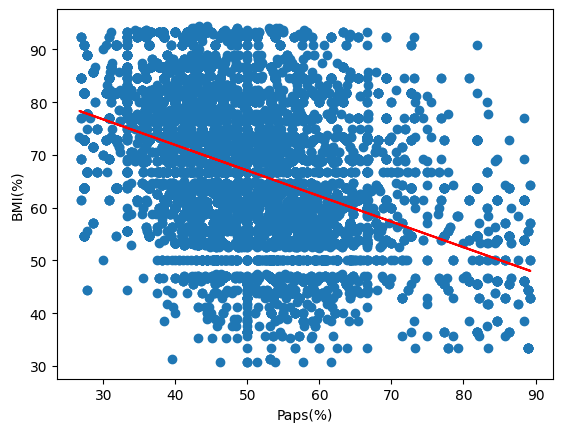

In [28]:
from scipy import stats
import matplotlib.pyplot as plt

# 데이터 준비
x = df_result['평균']
y = df_result['BMI(kg/㎡)']

# DataFrame으로 결합하여 결측치 제거
df = pd.DataFrame({'x': x, 'y': y})
df.dropna(inplace=True)

# 결측치 제거 후 x, y 다시 할당
x = df['x']
y = df['y']

# scipy를 사용한 선형 회귀
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# 선형 회귀 직선 플로팅
plt.scatter(x, y)
plt.plot(x, slope*x + intercept, 'r', label='fitted line')

# 라벨 추가
plt.xlabel('Paps(%)')
plt.ylabel('BMI(%)')

# 그래프 표시
plt.show()

In [31]:
# 상관관계 표시
correlation = df_result.corr(method = 'spearman')
correlation

,평균,BMI(kg/㎡)
평균,1.000000,-0.442318
BMI(kg/㎡),-0.442318,1.000000
